# 概率

## 基本概率论

在统计学中，我们把从概率分布中抽取样本的过程称为抽样，笼统来说可以把分布看作对事件的概率分配，将概率分配给一些离散选择的分布称为多项分布。

In [12]:
%matplotlib inline
import torch 
from torch.distributions import multinomial
from d2l import torch as d2l

In [15]:
fair_probs = torch.ones([6]) / 6
print(fair_probs)
multinomial.Multinomial(1,fair_probs).sample()

tensor([0.1667, 0.1667, 0.1667, 0.1667, 0.1667, 0.1667])


tensor([0., 0., 0., 1., 0., 0.])

10表示试验次数，从同一分布中生成多个样本

In [14]:
multinomial.Multinomial(10,fair_probs).sample()

tensor([1., 0., 3., 3., 1., 2.])

In [16]:
multinomial.Multinomial(1000,fair_probs).sample()

tensor([161., 158., 141., 174., 179., 187.])

In [17]:
counts = multinomial.Multinomial(1000,fair_probs).sample()
counts / 1000

tensor([0.1670, 0.1980, 0.1590, 0.1590, 0.1450, 0.1720])

我们可以进行500组实验，每组抽取10个样本

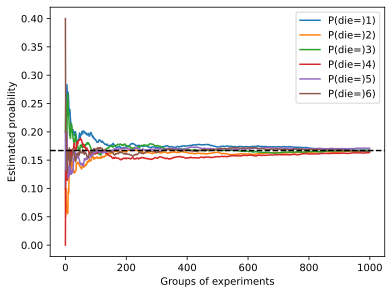

In [20]:
counts = multinomial.Multinomial(10,fair_probs).sample((1000,))
cum_counts = counts.cumsum(dim=0)
estimates = cum_counts / cum_counts.sum(dim=1,keepdim=True)

d2l.set_figsize((6,4.5))
for i in range(6):
    d2l.plt.plot(estimates[:,i].numpy(),
                 label=("P(die=)"+str(i + 1)+")"))
d2l.plt.axhline(y=0.167,color='black',linestyle='dashed')
d2l.plt.gca().set_xlabel('Groups of experiments')
d2l.plt.gca().set_ylabel('Estimated proability')
d2l.plt.legend()

### 概率论公理
### 随机变量

## 贝叶斯定理
